## 2. Bitcoin (BTC-USD) Analysis - High Risk (Cryptocurrency)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from matplotlib.ticker import FuncFormatter # Import FuncFormatter

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)
warnings.filterwarnings('ignore') 

### Load Processed Data

In [2]:
input_data_folder = '../Cleaned_Exports'

adj_close_filename = 'aligned_adj_close_prices.csv'
returns_filename = 'calculated_monthly_returns.csv'

adj_close_filepath = os.path.join(input_data_folder, adj_close_filename)
returns_filepath = os.path.join(input_data_folder, returns_filename)

adj_close_df = pd.read_csv(adj_close_filepath, index_col='Date', parse_dates=True)
monthly_returns = pd.read_csv(returns_filepath, index_col='Date', parse_dates=True)

print("\nData loaded successfully.")
print(f"Price data shape: {adj_close_df.shape}")
print(f"Return data shape: {monthly_returns.shape}")


Data loaded successfully.
Price data shape: (52, 4)
Return data shape: (51, 4)


#### Calculate Rolling Volatility

In [3]:
# Calculate rolling volatility based on loaded monthly returns
if 'monthly_returns' in locals() and not monthly_returns.empty:
    rolling_window = 12 # Define rolling window size
    rolling_std = monthly_returns.rolling(window=rolling_window).std()
    annualized_rolling_volatility = rolling_std * np.sqrt(12)
    print(f"\nCalculated {rolling_window}-Month Annualized Rolling Volatility.")
else:
    print("\nSkipping rolling volatility calculation as monthly returns data is not available.")
    # Assign an empty DataFrame or None if returns weren't loaded
    annualized_rolling_volatility = pd.DataFrame()


Calculated 12-Month Annualized Rolling Volatility.


### BTC-USD - Price Trend

--- BTC-USD Price Analysis ---


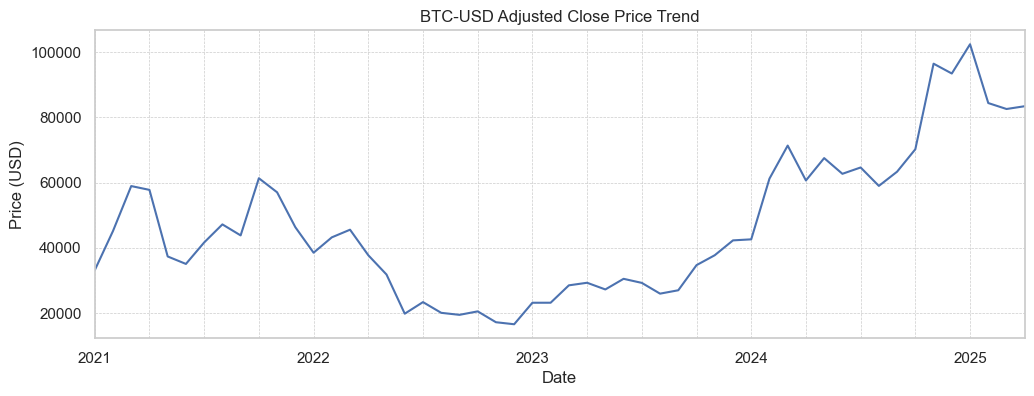

In [4]:
asset_ticker = 'BTC-USD'
print(f"--- {asset_ticker} Price Analysis ---")

if asset_ticker in adj_close_df.columns:
    plt.figure() # Use default figsize set earlier or specify here e.g., figsize=(12,4)
    adj_close_df[asset_ticker].plot()
    plt.title(f'{asset_ticker} Adjusted Close Price Trend')
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')
    # Apply log scale if needed - highly likely for BTC
    if adj_close_df[asset_ticker].max() / adj_close_df[asset_ticker].min() > 20:
        plt.yscale('log')
        plt.ylabel('Price (USD - Log Scale)')
    plt.grid(True, which="both", ls='--', linewidth=0.5)
    plt.show()
else:
    print(f"{asset_ticker} price data not found.")

#### BTC-USD - Price Trend Interpretation

The price trend for Bitcoin (BTC-USD) from early 2021 to early 2025 vividly illustrates the extreme volatility characteristic of the cryptocurrency asset class.

1.  **Massive Price Range:** The price fluctuated dramatically, starting around 30,000-40,000 dollars, peaking above 60,000 dollars in 2021, crashing below 20,000 dollars during 2022, and then embarking on a strong recovery rally through 2023 and 2024, ultimately exceeding 100,000 dollars in early 2025 before pulling back slightly.
2.  **Boom and Bust Cycles:** The chart clearly shows distinct phases: a significant rally in early 2021, followed by sharp corrections, a prolonged downturn ("crypto winter") through 2022 into 2023, and a powerful subsequent bull run starting in 2023.
3.  **Extreme Volatility Compared to TSLA:** While both are high-risk, the visual magnitude of BTC-USD's price swings (both in absolute dollar terms and likely percentage terms) appears even more pronounced than TSLA's over the same period.

This plot confirms BTC-USD as an exceptionally high-risk, high-volatility asset, capable of multi-fold gains but also subject to severe drawdowns. The trend highlights the cyclical and often unpredictable nature of cryptocurrency markets.

### BTC-USD - Return Analysis

--- BTC-USD Return Analysis ---


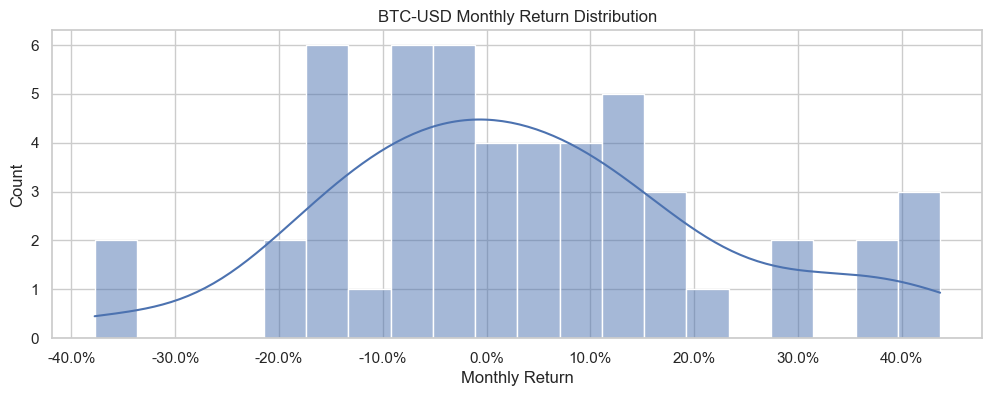


BTC-USD Monthly Return Statistics:
count   51.0000
mean     0.0344
std      0.1842
min     -0.3777
25%     -0.0714
50%      0.0104
75%      0.1216
max      0.4372


In [5]:
asset_ticker = 'BTC-USD'
print(f"--- {asset_ticker} Return Analysis ---")

if asset_ticker in monthly_returns.columns:
    # Distribution Plot
    plt.figure()
    sns.histplot(monthly_returns[asset_ticker], kde=True, bins=20)
    plt.title(f'{asset_ticker} Monthly Return Distribution')
    plt.xlabel('Monthly Return')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
    plt.show()

    # Descriptive Statistics
    print(f"\n{asset_ticker} Monthly Return Statistics:")
    try:
        print(monthly_returns[asset_ticker].describe().to_string(float_format='{:.4f}'.format))
    except Exception as e:
        print(f"Could not calculate describe() stats for {asset_ticker}: {e}")
else:
    print(f"{asset_ticker} return data not found.")

#### Interpretation: BTC-USD Return Analysis

This analysis focuses on the month-over-month percentage returns for Bitcoin (BTC-USD).

1.  **Distribution Shape and Spread:** The histogram reveals a very wide distribution of monthly returns, spanning roughly from -40% to +40%. This visual spread clearly indicates extremely high volatility. The distribution has significant weight in both positive and negative tails, highlighting the potential for large monthly gains and losses.
2.  **Statistical Summary:**
    *   **Mean and Median:** The average monthly return (`mean`) was strongly positive at 3.44%. The median return (`50%`) was also positive but much smaller at 1.04%, suggesting that while more than half the months saw gains, the average was significantly boosted by months with very large positive returns.
    *   **Volatility (Standard Deviation):** The monthly standard deviation (`std`) of 18.42% is exceptionally high, quantitatively confirming the extreme volatility observed in the histogram. This level of volatility is comparable to that observed for TSLA (17.80%), placing both firmly in the high-risk category based on this measure.
    *   **Range (Min/Max):** The data shows months with extreme performance, ranging from a maximum loss of 37.77% (`min`) to a maximum gain of 43.72% (`max`) in a single month. This >80 percentage point range underscores the immense potential price swings inherent in this asset.

In summary, both the visual distribution and the descriptive statistics characterize BTC-USD as an asset with extreme volatility, capable of producing very large positive average returns but also exposing investors to the possibility of severe monthly drawdowns. Its measured monthly volatility was very similar to TSLA's during this period.

### BTC-USD - Rolling Volatility Analysis

--- BTC-USD Rolling Volatility Analysis ---


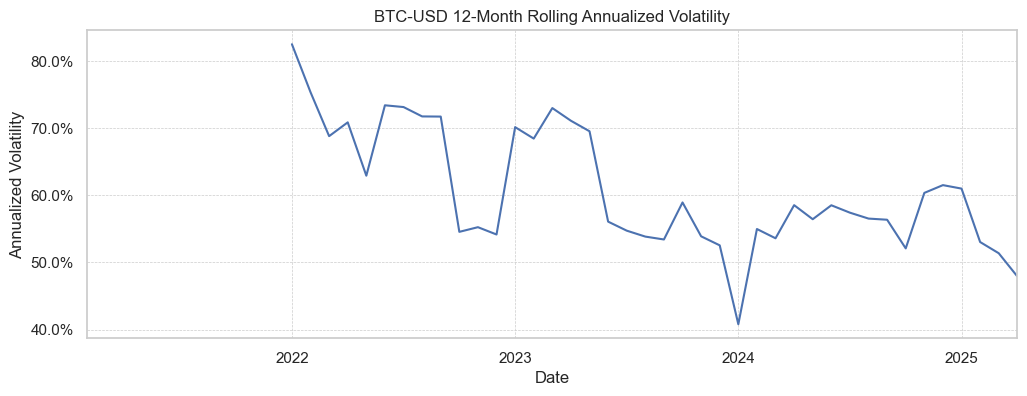

In [6]:
asset_ticker = 'BTC-USD'
print(f"--- {asset_ticker} Rolling Volatility Analysis ---")

if 'annualized_rolling_volatility' in locals() and not annualized_rolling_volatility.empty and asset_ticker in annualized_rolling_volatility.columns:
    plt.figure()
    annualized_rolling_volatility[asset_ticker].plot()
    plt.title(f'{asset_ticker} {rolling_window}-Month Rolling Annualized Volatility') # rolling_window should be defined earlier
    plt.ylabel('Annualized Volatility')
    plt.xlabel('Date')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    plt.grid(True, ls='--', linewidth=0.5)
    plt.show()
else:
    print(f"{asset_ticker} rolling volatility data not found or could not be calculated.")

#### Interpretation: BTC-USD Rolling Volatility

This chart shows the 12-month rolling annualized volatility for Bitcoin (BTC-USD), illustrating how its risk level changed during the analysis period.

1.  **Note on Start Date:** Similar to the TSLA chart, this plot begins in early 2022 because a full 12 months of prior return data is needed for the first calculation point.
2.  **Consistently Extreme Volatility:** Bitcoin's rolling volatility remained at very high levels throughout the entire period, generally oscillating between approximately 40% and over 80%. This confirms its persistent nature as an extremely high-risk asset.
3.  **Significant Swings in Risk:** The level of risk was far from constant. Volatility was highest at the beginning of the displayed period (early 2022), exceeding 80%. It then trended downwards with considerable fluctuations, reaching lows around 55% in mid-2022 and mid-2023. A particularly sharp decrease occurred towards the end of 2023, bottoming out near 40% in early 2024, before climbing again through 2024.
4.  **Dynamic and Erratic:** Compared perhaps even to TSLA, Bitcoin's rolling volatility appears quite erratic, with frequent sharp changes in direction, reflecting the often rapidly shifting sentiment and market conditions within the cryptocurrency space.

This plot underscores that while Bitcoin offers high potential returns, its risk level is not only extremely high on average but also subject to substantial and somewhat unpredictable changes over time.

## **Conclusion for BTC-USD**

Bitcoin (BTC-USD) displayed distinct cyclical patterns between 2021 and 2025, characterized by dramatic price surges ("booms") reaching peaks over 60,000 dollars and later exceeding 100,000 dollars, punctuated by sharp declines ("busts") with lows below 20,000 dollars. Its risk profile is classified as **extremely high**, confirmed by a wide monthly return distribution (spanning roughly -40% to +40%), a high standard deviation (around 18%), and consistently elevated rolling volatility (mostly 40%-80%). Despite this immense risk and potential for severe drawdowns, BTC-USD generated a strong positive average monthly return (~3.4%) over this specific timeframe. Therefore, while proving **beneficial** in terms of average returns during this period, its extreme volatility underscores the significant speculative risk involved.